<a href="https://colab.research.google.com/github/pavannayak9398/Machine-Learning/blob/main/House_Rent_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Rent Prediction**

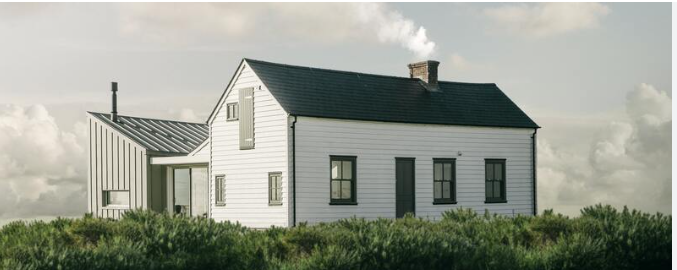

In [ ]:
#Import Necessary Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

**1. Load the datasets**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/FSDS @Kodi Senapati/Colab files/FSDS/Projects/Datasets/House_Rent_Dataset.csv")

print(df.columns)
print(len(df.columns))

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')
12


**2. Drop Irrelevant Column**

In [ ]:
df.drop('Posted On', axis=1, inplace=True)

print(df.columns)
print(len(df.columns))

Index(['BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom',
       'Point of Contact'],
      dtype='object')
11


**3. Check does each dtype matches with values**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Floor              4746 non-null   object
 4   Area Type          4746 non-null   object
 5   Area Locality      4746 non-null   object
 6   City               4746 non-null   object
 7   Furnishing Status  4746 non-null   object
 8   Tenant Preferred   4746 non-null   object
 9   Bathroom           4746 non-null   int64 
 10  Point of Contact   4746 non-null   object
dtypes: int64(4), object(7)
memory usage: 408.0+ KB


In [ ]:
df.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


**4. Check for NULL Values**

In [ ]:
df.isnull().sum()

,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0
Bathroom,0


In [ ]:
category_col=df.select_dtypes(include=['object']).columns.tolist()

for i in category_col:
  print(f"{i}:{df[i].nunique()}")

Floor:480
Area Type:3
Area Locality:2235
City:6
Furnishing Status:3
Tenant Preferred:3
Point of Contact:3


**Note: Here we can see that the values in columns such as Floor, Area Locality is very huga and Encoding may be cause high-dimensional data issues. We need to delimit the values into a reasonable meaning**

**4. Here Floor is converted to numerical based on below strategy**

* Ground = 0
* Upper Basement = -1
* Lower Basement = -2
* others as the 1st part ignoring next
  
  * 1 out of 5 = 1
  * 6 out of 18 = 6
  * 78 out of 84 = 78


This conversion is done based on considering floor from ground floor ignoring the total floors of building.

In [ ]:
def convert_floor(floor_str):
  first_part=floor_str.split(" out of ")[0]  # Extract the first part
  if first_part.lower() == 'ground':
    return 0
  elif first_part.lower() == 'upper basement':
    return -1
  elif first_part.lower() == 'lower basement':
    return -2
  else:
    return int(first_part)

# Apply the function to transform the column

df['Floor']=df['Floor'].apply(convert_floor)


In [ ]:
df['Floor'].unique()

array([ 0,  1,  2,  4,  3,  5,  7,  8, -1, 11, -2,  6, 14, 43, 13, 18, 17,
        9, 19, 60, 34, 12, 26, 25, 53, 16, 10, 39, 32, 47, 28, 20, 15, 65,
       40, 37, 22, 21, 30, 35, 33, 44, 41, 46, 27, 45, 48, 50, 24, 23, 29,
       49, 36, 76])

**5. Since the column likely impacts rent, target encoding is a good choice as it captures the relationship between locality and rent.**

* **Encode "Area Locality" based on the average rent for each locality.**

In [ ]:
# Calculate Mean Rent for Each Locality
locality_mean_rent = df.groupby('Area Locality')['Rent'].mean()

# Map Mean Rent to Each Locality
df['Area Locality Encoded'] = df['Area Locality'].map(locality_mean_rent)

# Drop the Original Column
df.drop(columns=['Area Locality'], inplace=True)

# Check Encoded Values
print(df['Area Locality Encoded'].head())

0     8250.0
1    11750.0
2    23187.5
3    16000.0
4     7500.0
Name: Area Locality Encoded, dtype: float64


In [ ]:
df.columns

Index(['BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       'Area Locality Encoded'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BHK                    4746 non-null   int64  
 1   Rent                   4746 non-null   int64  
 2   Size                   4746 non-null   int64  
 3   Floor                  4746 non-null   int64  
 4   Area Type              4746 non-null   object 
 5   City                   4746 non-null   object 
 6   Furnishing Status      4746 non-null   object 
 7   Tenant Preferred       4746 non-null   object 
 8   Bathroom               4746 non-null   int64  
 9   Point of Contact       4746 non-null   object 
 10  Area Locality Encoded  4746 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 408.0+ KB


**6. Split Categorical and Non-Categorical columns**




In [ ]:
category_col=df.select_dtypes(include=['object']).columns.tolist()

for i in category_col:
  print(f"{i}:{df[i].nunique()}")

Area Type:3
City:6
Furnishing Status:3
Tenant Preferred:3
Point of Contact:3


**7. Encode the object type to Numerical**

In [ ]:
df=pd.get_dummies(df, category_col, dtype=int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BHK                                4746 non-null   int64  
 1   Rent                               4746 non-null   int64  
 2   Size                               4746 non-null   int64  
 3   Floor                              4746 non-null   int64  
 4   Bathroom                           4746 non-null   int64  
 5   Area Locality Encoded              4746 non-null   float64
 6   Area Type_Built Area               4746 non-null   int64  
 7   Area Type_Carpet Area              4746 non-null   int64  
 8   Area Type_Super Area               4746 non-null   int64  
 9   City_Bangalore                     4746 non-null   int64  
 10  City_Chennai                       4746 non-null   int64  
 11  City_Delhi                         4746 non-null   int64

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


**8. Apply Regression algorithms**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [ ]:
X = df.drop(columns=['Rent'])
y = df['Rent']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
models={
    "Ranfom Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0)
}

results={}

# Train and evaluate models
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # Calculate metrics
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  # Store results
  results[name] = {
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R2 Score': r2
  }

print(f"{name}: MSE={mse:.4f}, MAE={mae:.4f}, RMSE={rmse:.4f}, R2={r2:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 3796, number of used features: 21
[LightGBM] [Info] Start training from score 35151.516333
CatBoost: MSE=963753883.5312, MAE=7755.5299, RMSE=31044.3857, R2=0.7582


### **Best Model Slection**

**Based on the metrics, XGBoost is the best model-**

* It has the lowest MSE and RMSE, which means its predictions are closest to the actual values on average.
* It has the highest R2 Score, showing it explains the most variance in the target variable compared to the other models.
* Although Random Forest has the lowest MAE, its higher RMSE and lower R2 suggest it is less consistent in its predictions than XGBoost.



### **Further more we can apply hyperparameter tuning on XGBoost for better performance**